<a href="https://colab.research.google.com/github/Pantercode/Analise_preco_casas/blob/main/discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importações de libs necessárias pra analise e desenvolvimento de dataviz e analise mais profundas de machine leraning
import pandas as pd
import importlib
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Leitura do dataset
df = pd.read_parquet(r'C:\Users\marcell.oliveira\Desktop\Global_Housing_Market_Analysis _2015_2024\arquivos\global_housing_market_extended.parquet')

In [ ]:
# Contar o número de valores nulos por coluna
nulos_por_coluna = df.isnull().sum()

# Exibir o número de colunas e linhas
linhas = df.shape[0]
colunas = df.shape[1]
print(f'O número de colunas é {colunas} e número de linhas é {linhas}')

# Exibir a contagem de valores nulos por coluna
print("Número de valores nulos por coluna:")
print(nulos_por_coluna)
df.dtypes


O número de colunas é 11 e número de linhas é 200
Número de valores nulos por coluna:
Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64


Country                   object
Year                       int64
House Price Index        float64
Rent Index               float64
Affordability Ratio      float64
Mortgage Rate (%)        float64
Inflation Rate (%)       float64
GDP Growth (%)           float64
Population Growth (%)    float64
Urbanization Rate (%)    float64
Construction Index       float64
dtype: object

Um mapa de correlação é uma visualização gráfica que exibe a relação entre diferentes variáveis de um conjunto de dados. Ele é geralmente utilizado para mostrar como as variáveis estão correlacionadas entre si, usando uma matriz onde cada célula representa o valor da correlação entre duas variáveis. A correlação pode variar entre -1 e +1:

+1: Correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).

0: Nenhuma correlação (as variáveis não têm relação entre si).

-1: Correlação negativa perfeita (quando uma variável aumenta, a outra diminui).

Esses mapas podem ser gerados com diferentes escalas de cores, sendo comuns as representações em tons de azul (para correlações negativas) e vermelho (para correlações positivas).

In [ ]:
colunas_numericas = [
    'House Price Index', 'Rent Index', 'Affordability Ratio',
    'Mortgage Rate (%)', 'Inflation Rate (%)', 'GDP Growth (%)',
    'Population Growth (%)', 'Urbanization Rate (%)', 'Construction Index'
]

# Remove valores ausentes
df_corr = df.dropna(subset=colunas_numericas)

# Calcula a matriz de correlação
corr = df_corr[colunas_numericas].corr()

# Gera o gráfico interativo
fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale="RdBu",
    aspect="auto",
    title="Mapa de Correlação entre Indicadores"
)

fig.update_layout(
    xaxis_title="Variável",
    yaxis_title="Variável",
    width=800,
    height=700
)

fig.show()

In [ ]:
#Gráfico  que faz a Analise do preço das casas por Pais ao Longo do Anos
fig = px.line(
    df,
    x="Year",
    y="House Price Index",
    color="Country",
    title="Preço de Casas ao longo do tempo por País",
)

# Adiciona filtro dropdown interativo
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {"label": pais, "method": "update",
                 "args": [
                     {"visible": [c == pais for c in df["Country"].unique()]},
                     {"title": f"House Price Index - {pais}"}
                 ]}
                for pais in df["Country"].unique()
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.05,
            "xanchor": "left",
            "y": 1.1,
            "yanchor": "top"
        }
    ]
)

fig.show()


In [ ]:
# Grafico que referência os 7 maiores PIBs dos paises independente do ano
top_7 = df.sort_values(by="GDP Growth (%)", ascending=False).head(7)

# Ordena 7 em ordem crescente de PIB
top_7 = top_7.sort_values(by="GDP Growth (%)")

# Gráfico
fig_top = px.bar(
    top_7,
    x="GDP Growth (%)",
    y=top_7["Country"] + " - " + top_7["Year"].astype(str),
    color="Country",
    orientation="h",
    text="GDP Growth (%)",
    title="🔝 Top 7 - Maiores Crescimentos do PIB "
)
fig_top.update_traces(texttemplate="%{text:.2f}", textposition="outside")
fig_top.update_layout(yaxis_title="País - Ano", xaxis_title="Crescimento do PIB (%)")
fig_top.show()



In [ ]:
# Grafico que referência os 7 piores PIBs dos paises independente do ano
bottom_7 = df.sort_values(by="GDP Growth (%)", ascending=True).head(7)

# Ordenar em ordem crescente de PIB (
bottom_7 = bottom_7.sort_values(by="GDP Growth (%)")

# Gráfico
fig_bottom = px.bar(
    bottom_7,
    x="GDP Growth (%)",
    y=bottom_7["Country"] + " - " + bottom_7["Year"].astype(str),  # País + Ano no eixo Y
    color="Country",
    orientation="h",
    text="GDP Growth (%)",
    hover_data=["Year"],
    title="🔻 Top 7 - Piores Crescimentos do PIB "
)
fig_bottom.update_traces(texttemplate="%{text:.2f}", textposition="outside")
fig_bottom.update_layout(yaxis_title="País - Ano", xaxis_title="Crescimento do PIB (%)")
fig_bottom.show()


In [ ]:
#Distribuição do crescimento Versus a contrução
fig = px.scatter(
    df,
    x="Urbanization Rate (%)",
    y="Construction Index",
    color="Country",
    size=np.abs(df["Population Growth (%)"]),  # 👈 valor absoluto
    title="Urbanização VS Construção "
)
fig.show()


In [ ]:
#Gráfico Agrupado da inflação ao longo do Tempo
# Agrupar por país e ano, somando inflação
df_total = df.groupby(["Country", "Year"], as_index=False)["Inflation Rate (%)"].sum()

# Ordenar os anos (caso o tipo da coluna seja string)
df_total["Year"] = df_total["Year"].astype(int)
df_total = df_total.sort_values(by="Year")


fig = px.bar(
    df_total[df_total["Country"] == df_total["Country"].iloc[0]],  # Mostra o 1º país por padrão
    x="Year",
    y="Inflation Rate (%)",
    text="Inflation Rate (%)",
    color="Country",
    title=f"Soma da Inflação por Ano - {df_total['Country'].iloc[0]}"
)

botoes = []
for pais in df_total["Country"].unique():
    df_pais = df_total[df_total["Country"] == pais]
    botoes.append(
        {
            "label": pais,
            "method": "update",
            "args": [
                {
                    "x": [df_pais["Year"]],
                    "y": [df_pais["Inflation Rate (%)"]],
                    "type": "bar"
                },
                {
                    "title": f"Soma da Inflação por Ano - {pais}"
                }
            ]
        }
    )

# Aplicar dropdown
fig.update_layout(
    updatemenus=[
        {
            "buttons": botoes,
            "direction": "down",
            "x": 0.05,
            "xanchor": "left",
            "y": 1.15,
            "yanchor": "top"
        }
    ],
    showlegend=False
)

# Ajustes visuais
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title="Ano",
    yaxis_title="Total de Inflação (%)"
)

fig.show()


In [ ]:
# Grafico que faz a analise todo os indicadores ao somando e agrupando ao longo dos anos
metricas = [col for col in df.select_dtypes(include="number").columns if col not in ["House Price Index", "Year"]]
anos = sorted(df["Year"].dropna().unique())
paises = sorted(df["Country"].dropna().unique())

# Listas para armazenar os traços e as combinações
traces = []
comb_keys = []

# Monta todos os traços de mapa + barra por (país, ano)
for ano in anos:
    df_ano = df[df["Year"] == ano]
    for pais in paises:
        df_sel = df_ano[df_ano["Country"] == pais]

        if not df_sel.empty:
            y_vals = [df_sel.iloc[0][m] for m in metricas]
        else:
            y_vals = [0]*len(metricas)

        # Mapa (fixo por ano, aparece junto com a barra)
        trace_map = go.Choropleth(
            locations=df_ano["Country"],
            locationmode="country names",
            z=df_ano["House Price Index"],
            colorscale="Viridis",
            colorbar_title="House Price Index",
            text=df_ano["Country"],
            visible=False,
            showscale=True
        )

        # Barras
        trace_bar = go.Bar(
            x=metricas,
            y=y_vals,
            text=[f"{v:.2f}" for v in y_vals],
            textposition="outside",
            marker_color="indianred",
            visible=False
        )

        traces.append((trace_map, trace_bar))
        comb_keys.append((pais, ano))

# Cria o gráfico
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{"type": "choropleth"}], [{"type": "xy"}]],
    row_heights=[0.55, 0.45],
    vertical_spacing=0.12
)

# Adiciona todos os traços
for tmap, tbar in traces:
    fig.add_trace(tmap, row=1, col=1)
    fig.add_trace(tbar, row=2, col=1)

# Inicialmente, ativa o primeiro par
fig.data[0].visible = True
fig.data[1].visible = True

# Botões dropdown
botoes_pais = []
for pais in paises:
    visible = []
    for (p, a) in comb_keys:
        show = (p == pais and a == anos[0])
        visible.extend([show, show])
    botoes_pais.append(
        dict(
            label=pais,
            method="update",
            args=[
                {"visible": visible},
                {"title.text": f"🌍 Mapa + Indicadores Econômicos - {pais} ({anos[0]})"}
            ]
        )
    )

botoes_ano = []
for ano in anos:
    visible = []
    for (p, a) in comb_keys:
        show = (a == ano and p == paises[0])
        visible.extend([show, show])
    botoes_ano.append(
        dict(
            label=str(ano),
            method="update",
            args=[
                {"visible": visible},
                {"title.text": f"🌍 Mapa + Indicadores Econômicos - {paises[0]} ({ano})"}
            ]
        )
    )

# Layout final
fig.update_layout(
    height=900,
    margin=dict(t=80, b=100),
    title_text=f"🌍 Mapa + Indicadores Econômicos - {paises[0]} ({anos[0]})",
    title_x=0.5,
    updatemenus=[
        dict(
            buttons=botoes_pais,
            direction="down",
            showactive=True,
            x=0.01, y=1.2,
            xanchor="left", yanchor="top"
        ),
        dict(
            buttons=botoes_ano,
            direction="down",
            showactive=True,
            x=0.25, y=1.2,
            xanchor="left", yanchor="top"
        )
    ]
)

fig.update_xaxes(tickangle=-45, row=2, col=1)
fig.update_yaxes(title="Valor das Métricas", row=2, col=1)

fig.show()


A detecção de outliers é uma técnica usada para identificar pontos de dados que se desviam significativamente do comportamento esperado ou padrão em um conjunto de dados. Em um contexto de análise de séries temporais, como anos ou datas específicas, detectar anos fora do padrão pode ser útil para identificar erros, dados inconsistentes ou eventos atípicos que podem impactar as conclusões da análise.

Analise Avançadas de Machine Learning

In [ ]:
# Detecção de Outliers detectar anos fora do padrão (outliers)

# Seleciona apenas as colunas numéricas que serão usadas na análise
colunas_numericas = [
    'House Price Index', 'Rent Index', 'Affordability Ratio',
    'Mortgage Rate (%)', 'Inflation Rate (%)', 'GDP Growth (%)',
    'Population Growth (%)', 'Urbanization Rate (%)', 'Construction Index'
]

# Remove linhas com dados ausentes
df_limpo = df.dropna(subset=colunas_numericas)

# Normaliza os dados para que fiquem na mesma escala
normalizador = StandardScaler()
dados_normalizados = normalizador.fit_transform(df_limpo[colunas_numericas])

# Aplica o modelo de detecção de valores fora do padrão
modelo = IsolationForest(contamination=0.05, random_state=42)
df_limpo['Valor_Atypico'] = modelo.fit_predict(dados_normalizados)  # -1 = fora do padrão

# Cria uma nova coluna com o rótulo mais fácil de entender
df_limpo['Situacao'] = df_limpo['Valor_Atypico'].map({1: 'Normal', -1: 'Fora do Padrão'})

# Mostra apenas os casos que foram considerados fora do padrão
fora_do_padrao = df_limpo[df_limpo['Situacao'] == 'Fora do Padrão']
print(fora_do_padrao[['Country', 'Year'] + colunas_numericas].head())

    Country  Year  House Price Index  Rent Index  Affordability Ratio  \
26       UK  2021          99.524299  100.571648             5.526951   
41   France  2016          86.936130   57.054460             3.163996   
45   France  2020         169.552323   77.244118             3.097539   
52    Italy  2017         102.359584  117.425578             3.109390   
131  Mexico  2016         134.126658  117.409440             6.076849   

     Mortgage Rate (%)  Inflation Rate (%)  GDP Growth (%)  \
26            1.621580            4.695570       -0.583115   
41            1.972215            4.939544       -1.430491   
45            6.026910            1.093363        0.554509   
52            6.349394            0.780539        5.129145   
131           4.663109            6.558183       -1.179922   

     Population Growth (%)  Urbanization Rate (%)  Construction Index  
26                2.291605              88.617857          143.189151  
41                0.116415              85.3

Feature Importance (Importância das Variáveis ou Atributos) é uma técnica usada para identificar quais características (ou variáveis) de um conjunto de dados têm maior impacto na previsão ou no modelo de aprendizado de máquina. No caso de previsão de preços de imóveis, as variáveis podem incluir atributos como taxa de juros, índice de urbanização, tamanho do imóvel, localização, entre outros.

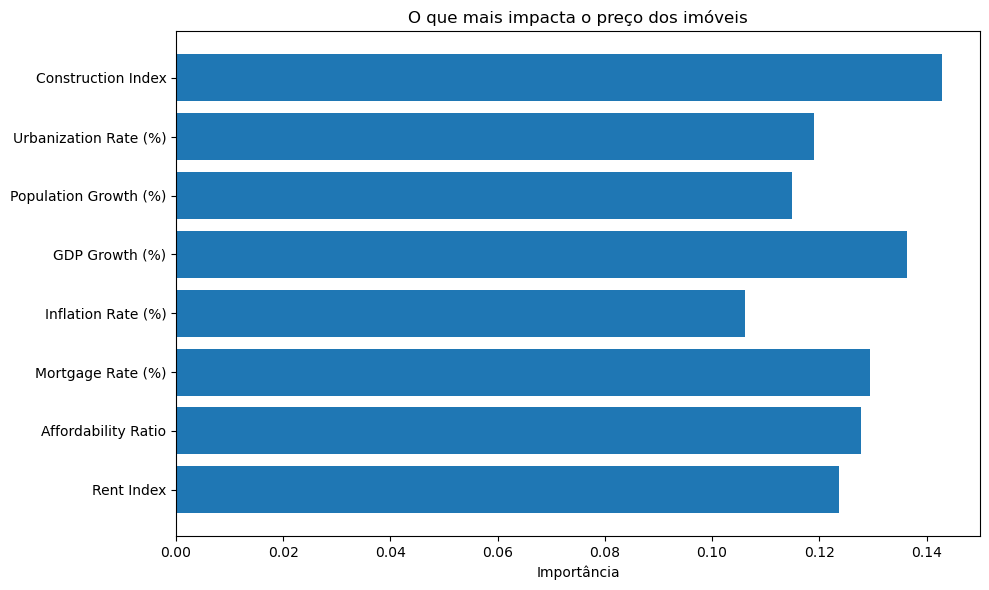

In [ ]:
#Feature Importance para Preço de Imóveis
# Define a variável alvo (preço dos imóveis) e os indicadores que serão usados como entrada
colunas_explicativas = [
    'Rent Index', 'Affordability Ratio', 'Mortgage Rate (%)',
    'Inflation Rate (%)', 'GDP Growth (%)', 'Population Growth (%)',
    'Urbanization Rate (%)', 'Construction Index'
]

alvo = 'House Price Index'

# Remove linhas com valores ausentes
df_limpo = df.dropna(subset=colunas_explicativas + [alvo])

# Normaliza os dados
normalizador = StandardScaler()
X = normalizador.fit_transform(df_limpo[colunas_explicativas])
y = df_limpo[alvo]

# Cria o modelo de regressão de floresta aleatória
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X, y)

# Importância de cada variável
importancias = modelo.feature_importances_

# Exibe em gráfico
plt.figure(figsize=(10, 6))
plt.barh(colunas_explicativas, importancias)
plt.xlabel('Importância')
plt.title('O que mais impacta o preço dos imóveis')
plt.tight_layout()
plt.show()


A Análise de Correlação Cruzada entre Indicadores é uma técnica usada para entender a relação entre diferentes variáveis ao longo do tempo ou em diferentes conjuntos de dados. Essa análise verifica como duas variáveis se comportam em relação uma à outra em diferentes períodos ou sob diferentes condições.

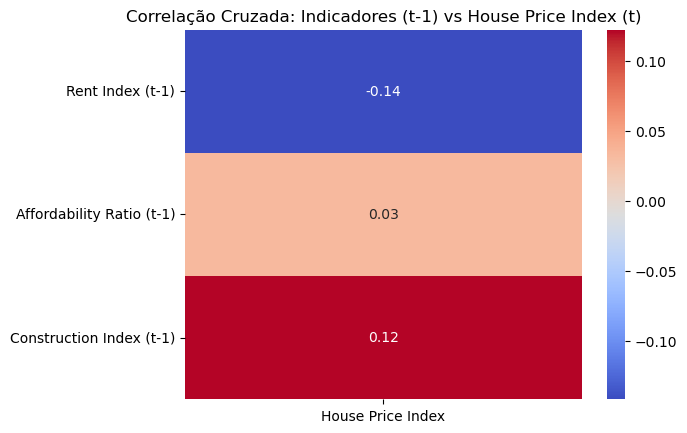

In [ ]:
# Análise de Correlação Cruzada entre Indicadores


# Organiza os dados por país e ano
df_ordenado = df.sort_values(by=["Country", "Year"])

# Cria cópias defasadas (lag) para comparar influência temporal
df_ordenado["Rent Index (t-1)"] = df_ordenado.groupby("Country")["Rent Index"].shift(1)
df_ordenado["Affordability Ratio (t-1)"] = df_ordenado.groupby("Country")["Affordability Ratio"].shift(1)
df_ordenado["Construction Index (t-1)"] = df_ordenado.groupby("Country")["Construction Index"].shift(1)




colunas_lag = [
    "Rent Index (t-1)",
    "Affordability Ratio (t-1)",
    "Construction Index (t-1)"
]

df_corr = df_ordenado.dropna(subset=colunas_lag + ["House Price Index"])

# Calcula correlação cruzada entre indicadores defasados e o preço do imóvel atual
corr_cruzada = df_corr[colunas_lag + ["House Price Index"]].corr()

# Mostra a correlação cruzada como heatmap
sns.heatmap(
    corr_cruzada[["House Price Index"]].drop(index="House Price Index"),
    annot=True, cmap="coolwarm", fmt=".2f", cbar=True
)
plt.title("Correlação Cruzada: Indicadores (t-1) vs House Price Index (t)")
plt.show()
